# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
!pip install shap
!pip install lime
import shap
import lime
from lime import lime_tabular


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c0c6e18e0b755c63bd7e281b9c5eecc9d7e2918796efa52deefbfc2a5dbf466d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dataset/KDD.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:
Trained_Data = pd.read_csv("/content/dataset/KDD/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("/content/dataset/KDD/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

In [ ]:
Trained_Data

0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60    0.88    0.00    0.00    0.00  0.00    0.00   normal  15  
1       0.05    0.00    0.00    1.00    1.00  0.00    0.00  neptune  19  
2       0.00    0.03    0.04    0.03    0.01  0.00    0.01   normal  21  
3       0.00    0.00    0.00    0.00    0.00  0.00    0.00   normal  21  
4       0.07    0.00    0.00    0.00    0.00  1.00    1.00  neptune  21  
...      ...     ...     ...     ...     ...   ...     ...      ...  ..  
125967  0.06    0.00    0.00    1.00    1.00  0.00    0.00  neptune  20  
125968  0.01    0.01    0.00    0.00    0.00  0.00    0.00   normal  21  
125969  0.06    0.00    0.00    0.72    0.00  0.01    0.00   normal  18  
125970  0.05    0.00    0.00    1.00    1.00  0.00    0.00  neptune  20  
125971  0.03    0.30    0.00    0.00    0.00  0.00    0.00   normal  21  

[125972 rows x 43 columns]

In [ ]:
Tested_Data

0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6  ...  0.04.1  \
0      0   tcp   private   REJ      0      0    0    0    0    0  ...    0.00   
1      2   tcp  ftp_data    SF  12983      0    0    0    0    0  ...    0.61   
2      0  icmp     eco_i    SF     20      0    0    0    0    0  ...    1.00   
3      1   tcp    telnet  RSTO      0     15    0    0    0    0  ...    0.31   
4      0   tcp      http    SF    267  14515    0    0    0    0  ...    1.00   
...   ..   ...       ...   ...    ...    ...  ...  ...  ...  ...  ...     ...   
22538  0   tcp      smtp    SF    794    333    0    0    0    0  ...    0.72   
22539  0   tcp      http    SF    317    938    0    0    0    0  ...    1.00   
22540  0   tcp      http    SF  54540   8314    0    0    0    2  ...    1.00   
22541  0   udp  domain_u    SF     42     42    0    0    0    0  ...    0.99   
22542  0   tcp    sunrpc   REJ      0      0    0    0    0    0  ...    0.08   

       0.06.1  0.00.3  0.00.4  0.00.5  0.00.6  1.00.2  1.00.3  neptune  21  
0        0.06    0.00    0.00    0.00     0.0    1.00    1.00  neptune  21  
1        0.04    0.61    0.02    0.00     0.0    0.00    0.00   normal  21  
2        0.00    1.00    0.28    0.00     0.0    0.00    0.00    saint  15  
3        0.17    0.03    0.02    0.00     0.0    0.83    0.71    mscan  11  
4        0.00    0.01    0.03    0.01     0.0    0.00    0.00   normal  21  
...       ...     ...     ...     ...     ...     ...     ...      ...  ..  
22538    0.06    0.01    0.01    0.01     0.0    0.00    0.00   normal  21  
22539    0.00    0.01    0.01    0.01     0.0    0.00    0.00   normal  21  
22540    0.00    0.00    0.00    0.00     0.0    0.07    0.07     back  15  
22541    0.01    0.00    0.00    0.00     0.0    0.00    0.00   normal  21  
22542    0.03    0.00    0.00    0.00     0.0    0.44    1.00    mscan  14  

[22543 rows x 43 columns]

# Columns Modification

In [ ]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [ ]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [ ]:
Trained_Data.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           udp       other   SF        146          0     0   
1         0           tcp     private   S0          0          0     0   
2         0           tcp        http   SF        232       8153     0   
3         0           tcp        http   SF        199        420     0   
4         0           tcp     private  REJ          0          0     0   
5         0           tcp     private   S0          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp  remote_job   S0          0          0     0   
8         0           tcp     private   S0          0          0     0   
9         0           tcp     private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   
5               0       0    0  ...                    0.04   
6               0       0    0  ...                    0.06   
7               0       0    0  ...                    0.09   
8               0       0    0  ...                    0.05   
9               0       0    0  ...                    0.05   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   
5                    0.05                         0.00   
6                    0.07                         0.00   
7                    0.05                         0.00   
8                    0.06                         0.00   
9                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   
5                         0.00                  1.00   
6                         0.00                  1.00   
7                         0.00                  1.00   
8                         0.00                  1.00   
9                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   
5                      1.00                   0.0                      0.00   
6                      1.00                   0.0                      0.00   
7                      1.00                   0.0                      0.00   
8                      1.00                   0.0                      0.00   
9                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  
5  neptune     21  
6  neptune     21  
7  neptune     21  
8  neptune     21  
9  neptune     21  

[10 rows x 43 columns]

In [ ]:
Tested_Data.head(10)

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   
5         0           tcp      smtp    SF       1022        387     0   
6         0           tcp    telnet    SF        129        174     0   
7         0           tcp      http    SF        327        467     0   
8         0           tcp       ftp    SF         26        157     0   
9         0           tcp    telnet    SF          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.61   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    0.31   
4               0       0    0  ...                    1.00   
5               0       0    0  ...                    0.11   
6               0       0    0  ...                    1.00   
7               0       0    0  ...                    1.00   
8               0       0    0  ...                    0.50   
9               0       0    0  ...                    0.50   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.04                         0.61   
2                    0.00                         1.00   
3                    0.17                         0.03   
4                    0.00                         0.01   
5                    0.72                         0.00   
6                    0.00                         0.00   
7                    0.00                         0.01   
8                    0.08                         0.02   
9                    0.01                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.02                  0.00   
2                         0.28                  0.00   
3                         0.02                  0.00   
4                         0.03                  0.01   
5                         0.00                  0.00   
6                         0.00                  0.01   
7                         0.03                  0.00   
8                         0.00                  0.00   
9                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  1.00                      1.00   
1                      0.00                  0.00                      0.00   
2                      0.00                  0.00                      0.00   
3                      0.00                  0.83                      0.71   
4                      0.00                  0.00                      0.00   
5                      0.00                  0.72                      0.04   
6                      0.01                  0.02                      0.02   
7                      0.00                  0.00                      0.00   
8                      0.00                  0.00                      0.00   
9                      0.00                  0.66                      0.32   

         attack  level  
0       neptune     21  
1        normal     21  
2         saint     15  
3         mscan     11  
4        normal     21  
5        normal     21  
6  guess_passwd     15  
7        normal     21  
8  guess_passwd      7  
9         mscan      9  

[10 rows x 43 columns]

# Data Description

In [ ]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
Trained_Data.describe()

duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125972.000000    125972.000000  ...       125972.000000   
mean        0.395739         0.279253  ...          115.653725   
std         0.489011        23.942137  ...          110.702886   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate          level  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

In [ ]:
Tested_Data.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22543.000000  2.254300e+04  2.254300e+04  22543.000000    22543.000000   
mean     218.868784  1.039591e+04  2.056110e+03      0.000311        0.008428   
std     1407.207069  4.727969e+05  2.121976e+04      0.017619        0.142602   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22543.000000  22543.000000       22543.000000  22543.000000   
mean       0.000710      0.105399           0.021648      0.442222   
std        0.036474      0.928448           0.150331      0.496661   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_srv_count  dst_host_same_srv_rate  \
count     22543.000000  ...        22543.000000            22543.000000   
mean          0.119904  ...          140.756332                0.608747   
std           7.269758  ...          111.783059                0.435681   
min           0.000000  ...            0.000000                0.000000   
25%           0.000000  ...           15.000000                0.070000   
50%           0.000000  ...          168.000000                0.920000   
75%           0.000000  ...          255.000000                1.000000   
max         796.000000  ...          255.000000                1.000000   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
count            22543.000000                 22543.000000   
mean                 0.090541                     0.132267   
std                  0.220722                     0.306274   
min                  0.000000                     0.000000   
25%                  0.000000                     0.000000   
50%                  0.010000                     0.000000   
75%                  0.060000                     0.030000   
max                  1.000000                     1.000000   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
count                 22543.000000          22543.000000   
mean                      0.019639              0.097818   
std                       0.085396              0.273144   
min                       0.000000              0.000000   
25%                       0.000000              0.000000   
50%                       0.000000              0.000000   
75%                       0.010000              0.000000   
max                       1.000000              1.000000   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
count              22543.000000          22543.000000   
mean                   0.099430              0.233351   
std                    0.281872              0.387204   
min                    0.000000              0.000000   
25%                    0.000000              0.000000   
50%                    0.000000              0.000000   
75%                    0.000000              0.360000   
max                    1.000000              1.000000   

       dst_host_srv_rerror_rate         level  
count              22543.000000  22543.000000  
mean                   0.226649     18.017833  
std                    0.400851      4.270409  
min                    0.000000      0.000000  
25%                    0.000000     17.000000  
50%                    0.000000     20.000000  
75%                    0

In [ ]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [ ]:
Tested_Data.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [ ]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

In [ ]:
Tested_Data.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


In [ ]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'phf', 'perl', 'buffer_overflow', 'smurf', 'pod', 'loadmodule', 'portsweep', 'neptune', 'warezclient', 'land', 'teardrop', 'satan', 'nmap', 'ftp_write', 'guess_passwd', 'spy', 'rootkit', 'back', 'normal', 'multihop', 'warezmaster', 'imap', 'ipsweep'} 

# Classifying The Attack Results

In [ ]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [ ]:
Trained_Data.head(10) # 'attack_state' column is added

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           udp       other   SF        146          0     0   
1         0           tcp     private   S0          0          0     0   
2         0           tcp        http   SF        232       8153     0   
3         0           tcp        http   SF        199        420     0   
4         0           tcp     private  REJ          0          0     0   
5         0           tcp     private   S0          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp  remote_job   S0          0          0     0   
8         0           tcp     private   S0          0          0     0   
9         0           tcp     private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.60   
1               0       0    0  ...                    0.05   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.07   
5               0       0    0  ...                    0.05   
6               0       0    0  ...                    0.07   
7               0       0    0  ...                    0.05   
8               0       0    0  ...                    0.06   
9               0       0    0  ...                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   
5                         0.00                         0.00   
6                         0.00                         0.00   
7                         0.00                         0.00   
8                         0.00                         0.00   
9                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   
5                  1.00                      1.00                   0.0   
6                  1.00                      1.00                   0.0   
7                  1.00                      1.00                   0.0   
8                  1.00                      1.00                   0.0   
9                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate   attack  level  attack_state  
0                      0.00   normal     15             0  
1                      0.00  neptune     19             1  
2                      0.01   normal     21             0  
3                      0.00   normal     21             0  
4                      1.00  neptune     21             1  
5                      0.00  neptune     21             1  
6                      0.00  neptune     21             1  
7                      0.00  neptune     21             1  
8                      0.00  neptune     21             1  
9                      1.00  neptune     21             1  

[10 rows x 44 columns]

In [ ]:
Tested_Data.head(10) # 'attack_state' column is added

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   
5         0           tcp      smtp    SF       1022        387     0   
6         0           tcp    telnet    SF        129        174     0   
7         0           tcp      http    SF        327        467     0   
8         0           tcp       ftp    SF         26        157     0   
9         0           tcp    telnet    SF          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.06   
1               0       0    0  ...                    0.04   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.17   
4               0       0    0  ...                    0.00   
5               0       0    0  ...                    0.72   
6               0       0    0  ...                    0.00   
7               0       0    0  ...                    0.00   
8               0       0    0  ...                    0.08   
9               0       0    0  ...                    0.01   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.61                         0.02   
2                         1.00                         0.28   
3                         0.03                         0.02   
4                         0.01                         0.03   
5                         0.00                         0.00   
6                         0.00                         0.00   
7                         0.01                         0.03   
8                         0.02                         0.00   
9                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  1.00   
1                  0.00                      0.00                  0.00   
2                  0.00                      0.00                  0.00   
3                  0.00                      0.00                  0.83   
4                  0.01                      0.00                  0.00   
5                  0.00                      0.00                  0.72   
6                  0.01                      0.01                  0.02   
7                  0.00                      0.00                  0.00   
8                  0.00                      0.00                  0.00   
9                  0.00                      0.00                  0.66   

   dst_host_srv_rerror_rate        attack  level  attack_state  
0                      1.00       neptune     21             1  
1                      0.00        normal     21             0  
2                      0.00         saint     15             1  
3                      0.71         mscan     11             1  
4                      0.00        normal     21             0  
5                      0.04        normal     21             0  
6                      0.02  guess_passwd     15             1  
7                      0.00        normal     21             0  
8                      0.00  guess_passwd      7             1  
9                      0.32         mscan      9             1  

[10 rows x 44 columns]

# Check Data for any missing values

In [ ]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No missing data

# Check for duplicates

In [ ]:
Trained_Data.duplicated().sum()

0

In [ ]:
Tested_Data.duplicated().sum()

0

No duplicate data


# Handling Outliers

In [ ]:
Trained_Data.shape

(125972, 44)

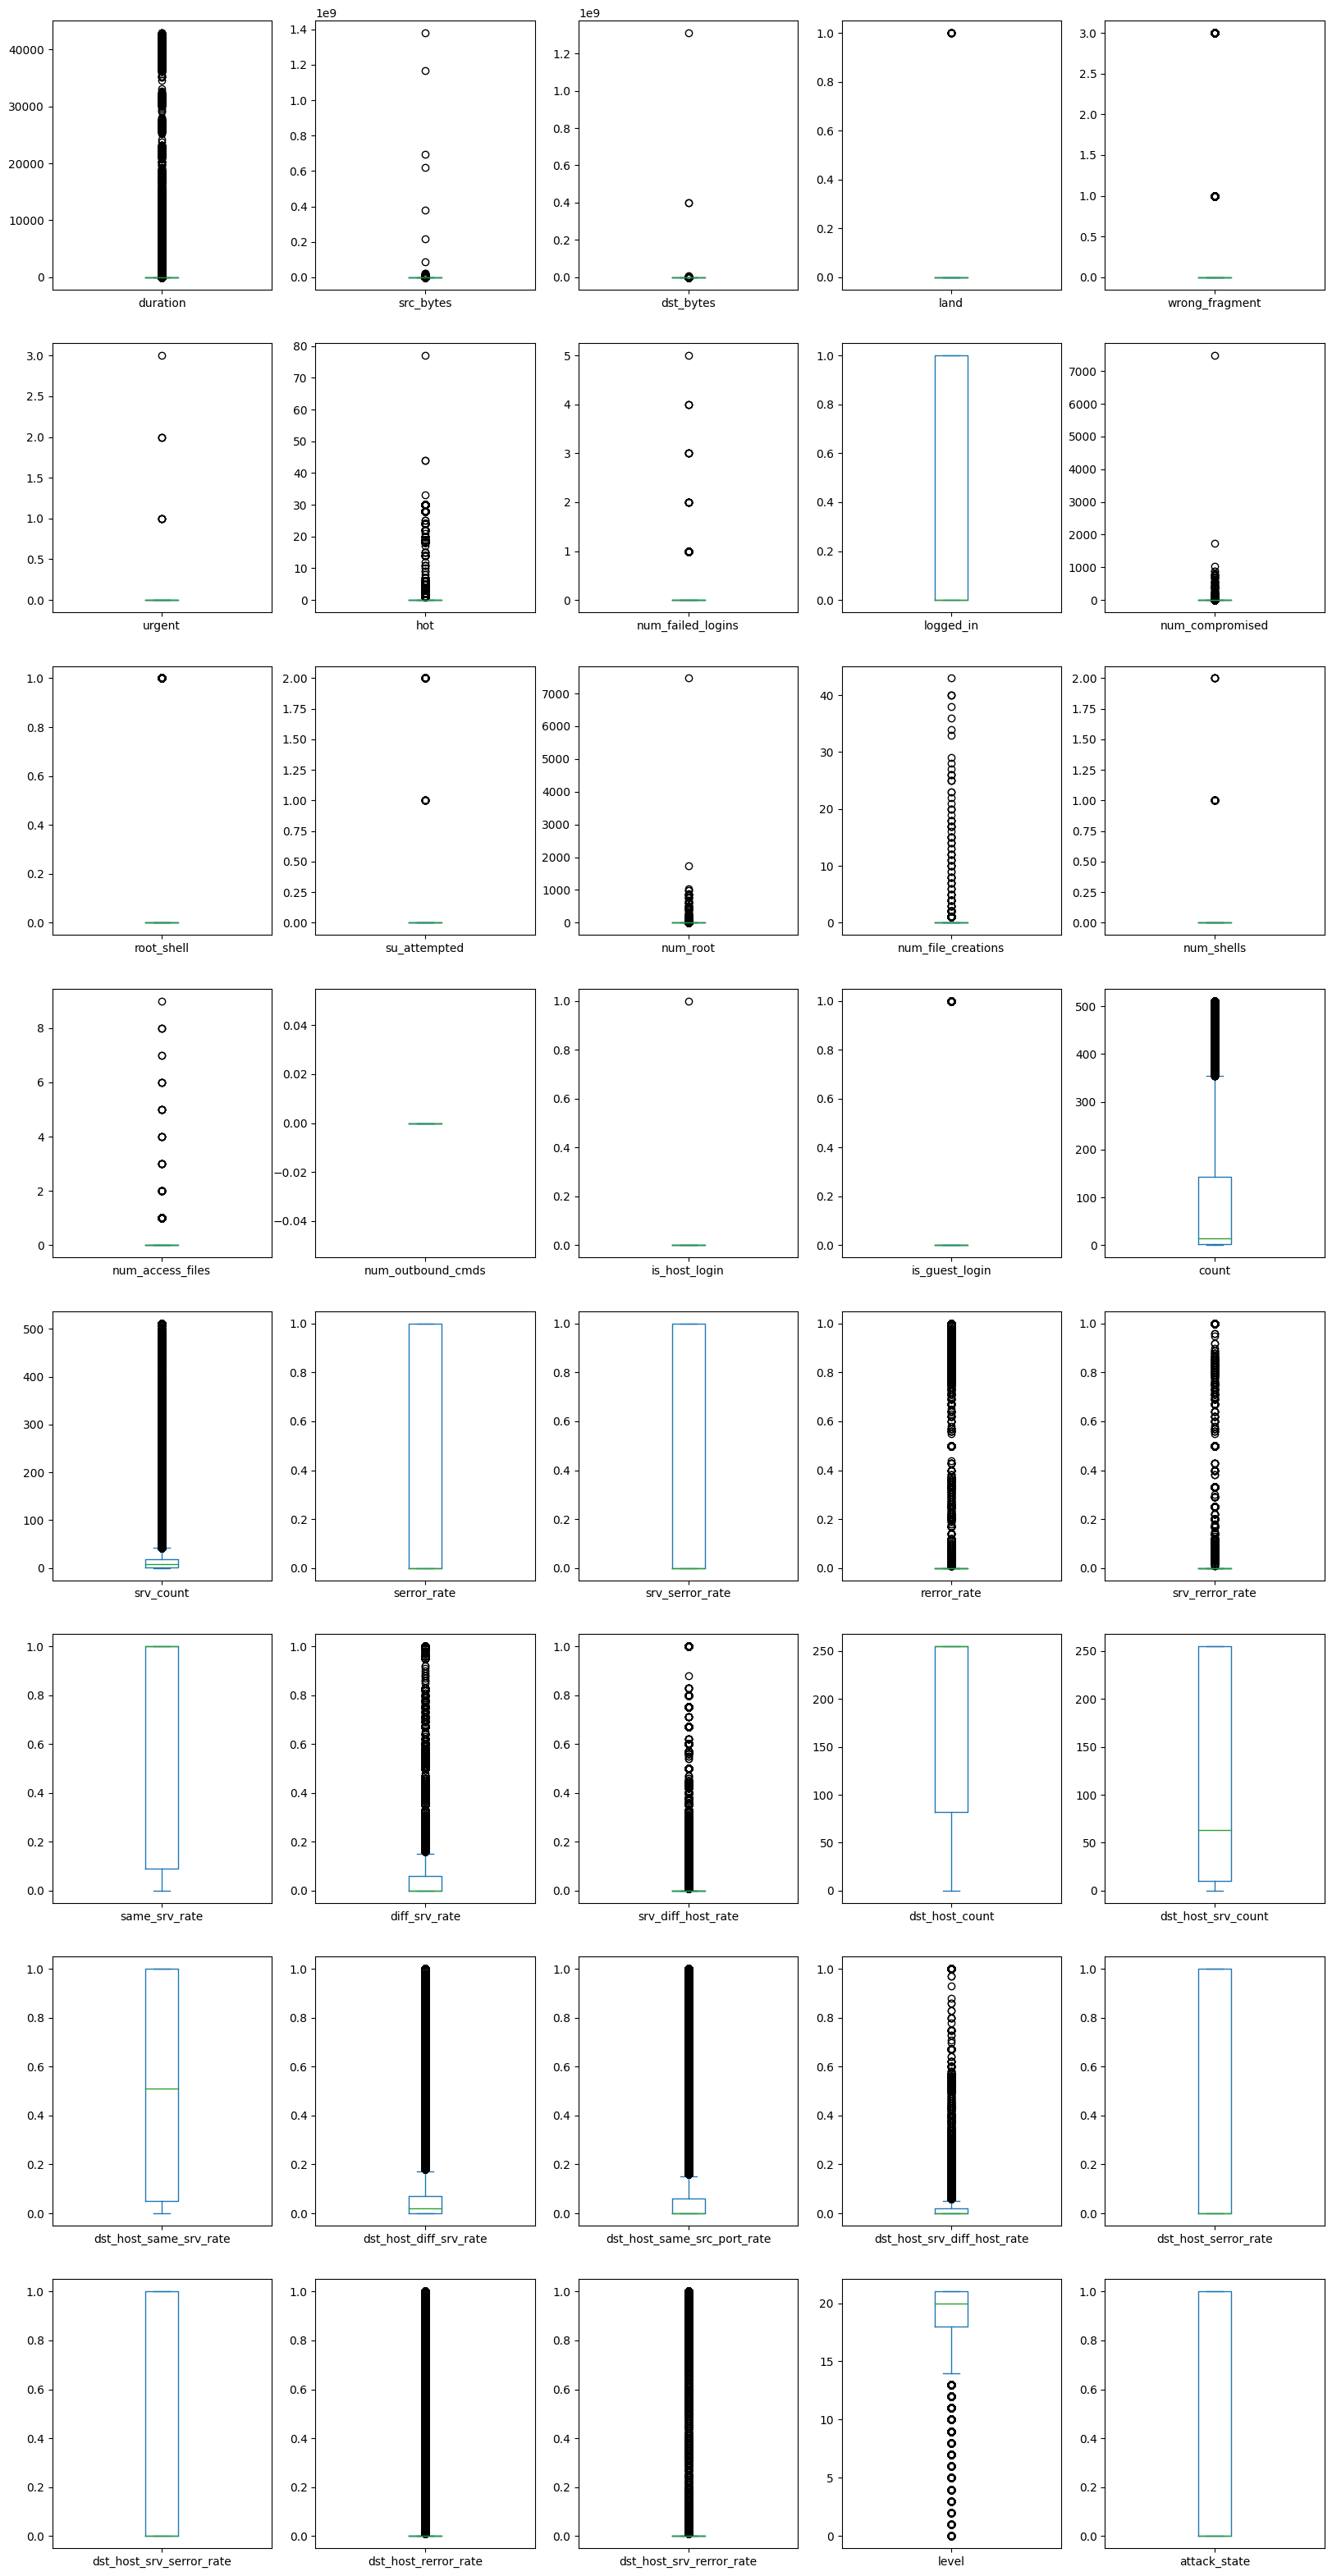

In [ ]:
Trained_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [ ]:
Tested_Data.shape

(22543, 44)

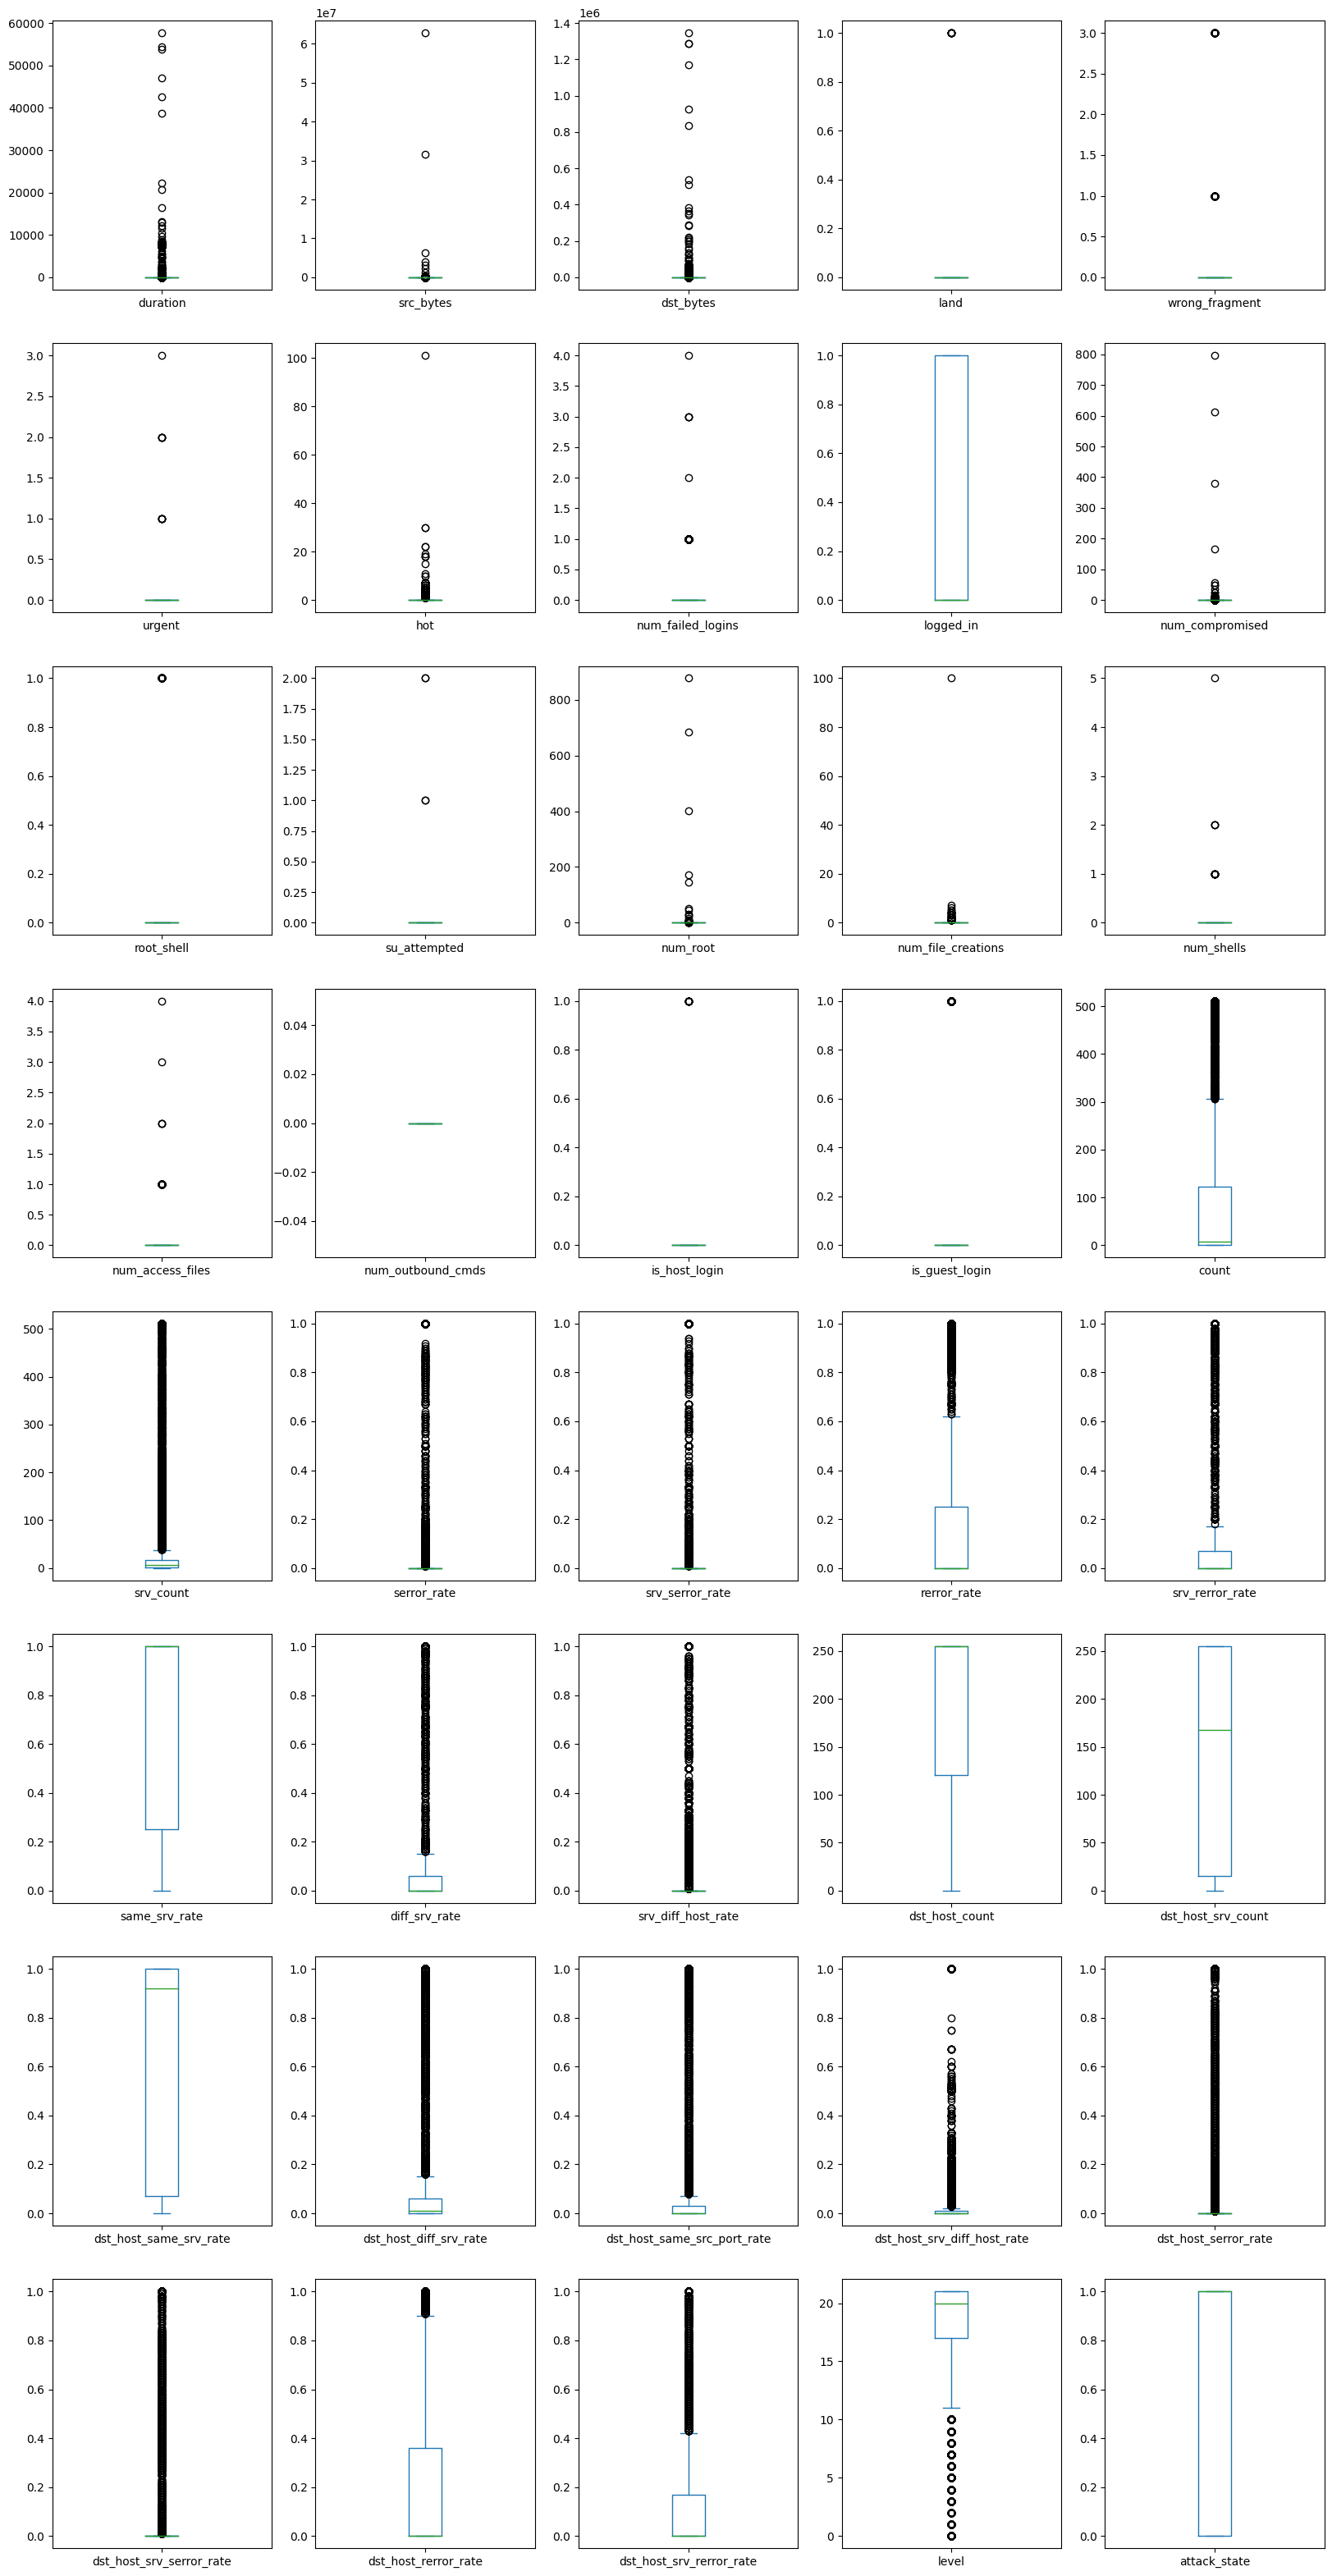

In [ ]:
Tested_Data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40))
plt.show()

No significant outliers in the data

# Data Encoding

In [ ]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [ ]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [ ]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

# Data Splitting

In [ ]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)

Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [ ]:
# Splitting the data into training, testing, and validation sets
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
#X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)


75% of the original data : **Training set** <br>
25% of the original data:  **Evalutation set**

Evaluation set is Split further into:<br>
**Testing set**  (75% of the evaluation set)<br>
**Validation set** (25% of the evaluation set)


# Data Scaling

In [ ]:
# Store the feature names before scaling
feature_names = Trained_Data.drop(['attack', 'level', 'attack_state'], axis=1).columns.tolist()

from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

X_train_train = scaler.fit_transform(X_train_train)
X_test_train= scaler.transform(X_test_train)
#X_train_test = scaler.fit_transform(X_train_test)
#X_test_test= scaler.transform(X_test_test)

In [ ]:
X_train_train.shape, Y_train_train.shape

((94479, 124), (94479,))

In [ ]:
X_test_train.shape, Y_test_train.shape

((31493, 124), (31493,))

In [ ]:
#X_train_test.shape, Y_train_test.shape

In [ ]:
#X_test_test.shape, Y_test_test.shape

# Data Modelling

In [ ]:
def plot_shap_explanations(Model_Name, Model_Abb, X_test):
    explainer = shap.Explainer(Model_Abb.predict, X_test)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"{Model_Name} SHAP Summary Plot")
    plt.show()

In [ ]:
def Evaluate(Model_Name, Model_Abb, X_train, Y_train, X_test, Y_test):
    # Predictions and evaluation metrics for training data
    train_Pred_Value = Model_Abb.predict(X_train)
    train_Accuracy = metrics.accuracy_score(Y_train, train_Pred_Value)
    train_Sensitivity = metrics.recall_score(Y_train, train_Pred_Value)
    train_Precision = metrics.precision_score(Y_train, train_Pred_Value)
    train_F1_score = metrics.f1_score(Y_train, train_Pred_Value)
    train_Recall = metrics.recall_score(Y_train, train_Pred_Value)

    # Predictions and evaluation metrics for testing data
    test_Pred_Value = Model_Abb.predict(X_test)
    test_Accuracy = metrics.accuracy_score(Y_test, test_Pred_Value)
    test_Sensitivity = metrics.recall_score(Y_test, test_Pred_Value)
    test_Precision = metrics.precision_score(Y_test, test_Pred_Value)
    test_F1_score = metrics.f1_score(Y_test, test_Pred_Value)
    test_Recall = metrics.recall_score(Y_test, test_Pred_Value)

    print('--------------------------------------------------\n')
    print('Training Results for {} Model:'.format(Model_Name))
    print('Training Accuracy   = {}'.format(np.round(train_Accuracy, 3)))
    print('Training Sensitivity = {}'.format(np.round(train_Sensitivity, 3)))
    print('Training Precision  = {}'.format(np.round(train_Precision, 3)))
    print('Training F1 Score   = {}'.format(np.round(train_F1_score, 3)))
    print('Training Recall     = {}'.format(np.round(train_Recall, 3)))
    print('--------------------------------------------------\n')

    print('Testing Results for {} Model:'.format(Model_Name))
    print('Testing Accuracy   = {}'.format(np.round(test_Accuracy, 3)))
    print('Testing Sensitivity = {}'.format(np.round(test_Sensitivity, 3)))
    print('Testing Precision  = {}'.format(np.round(test_Precision, 3)))
    print('Testing F1 Score   = {}'.format(np.round(test_F1_score, 3)))
    print('Testing Recall     = {}'.format(np.round(test_Recall, 3)))
    print('--------------------------------------------------\n')

    # Confusion matrix and ROC curve for testing data
    Confusion_Matrix = metrics.confusion_matrix(Y_test, test_Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names=['Normal', 'Attack'], figsize=(5.55, 5), colorbar="blue")
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)

    # SHAP Explanations

    #explainer = shap.Explainer(Model_Abb.predict, X_test, shap.approximators.gaussian)
    #explainer = shap.Explainer(Model_Abb.predict, X_test,nsamples=100, nthreads=4)

    '''explainer = shap.Explainer(Model_Abb.predict, X_test)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"{Model_Name} SHAP Summary Plot")
    plt.show()'''

# LIME Explanations

    num_features = X_train_train.shape[1]
    explainer_lime = lime_tabular.LimeTabularExplainer(X_train_train, mode="classification", feature_names=Trained_Data.columns.tolist(), class_names=['Normal', 'Attack'])
    instance_idx = 5
    instance = X_test_train[instance_idx]
    true_class = Y_test_train.iloc[instance_idx]
    explanation = explainer_lime.explain_instance(instance, Model_Abb.predict_proba, num_features=num_features, top_labels=1)
    explanation.show_in_notebook(show_table=True, show_all=False)
    explanation.save_to_file(f'{Model_Name}_lime_explanation.html')

    #plot_shap_explanations(Model_Name, Model_Abb, X_test)


In [ ]:
'''def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)'''

'def GridSearch(Model_Abb, Parameters, X_train, Y_train):\n    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)\n    Grid_Result = Grid.fit(X_train, Y_train)\n    Model_Name = Grid_Result.best_estimator_\n\n    return (Model_Name)'

Speed of execution order from fastest to slowest:

Logistic Regression <br>
Decision Tree<br>
KNN (K-Nearest Neighbors)<br>
SVM (Support Vector Machine)<br>
Random Forest<br>

# Decision tree classifier

In [ ]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [ ]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.903078991098551, 0.9007398469501159)

--------------------------------------------------

Training Results for Decision Tree Classifier Model:
Training Accuracy   = 0.903
Training Sensitivity = 0.902
Training Precision  = 0.891
Training F1 Score   = 0.896
Training Recall     = 0.902
--------------------------------------------------

Testing Results for Decision Tree Classifier Model:
Testing Accuracy   = 0.901
Testing Sensitivity = 0.9
Testing Precision  = 0.889
Testing F1 Score   = 0.895
Testing Recall     = 0.9
--------------------------------------------------



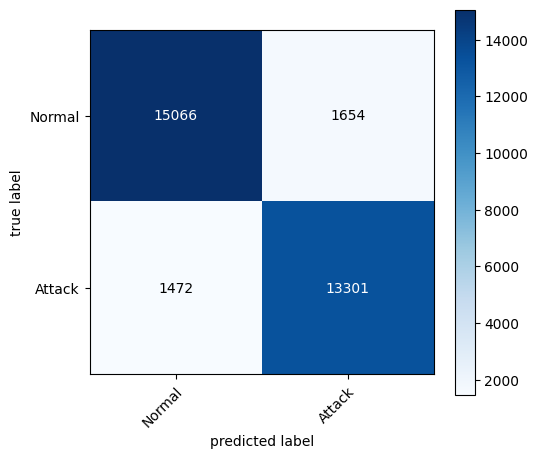

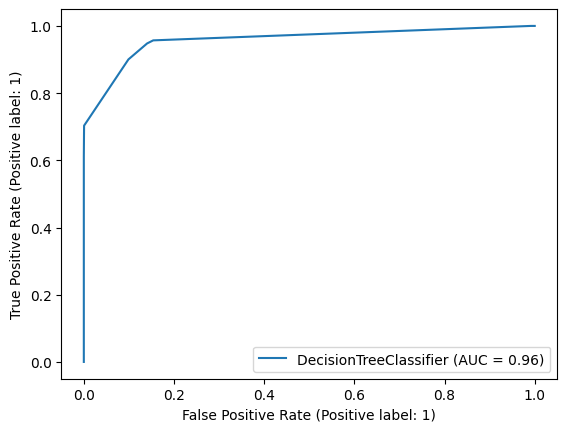

In [ ]:
Evaluate('Decision Tree Classifier', DT, X_train_train, Y_train_train, X_test_train, Y_test_train)

In [ ]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

# LOGISTIC REGRESSION

In [ ]:
'''# Define hyperparameters for logistic regression
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

# Create a dictionary of hyperparameters
parameters = {'penalty': penalty,
              'C': C,
              'solver': solver}'''

In [ ]:
'''# Perform grid search to find the best hyperparameters
LR_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=3, n_jobs=-1)
LR_grid.fit(X_train_train, Y_train_train)

# Get the best hyperparameters
best_LR = LR_grid.best_estimator_'''

In [ ]:
'''# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", LR_grid.best_params_)

# Evaluate Logistic Regression with best hyperparameters
Evaluate('Logistic Regression with Hyperparameters', best_LR, X_train_train, Y_train_train, X_test_train, Y_test_train)'''

--------------------------------------------------

Training Results for Logistic Regression Model:
Training Accuracy   = 0.99
Training Sensitivity = 0.992
Training Precision  = 0.987
Training F1 Score   = 0.99
Training Recall     = 0.992
--------------------------------------------------

Testing Results for Logistic Regression Model:
Testing Accuracy   = 0.99
Testing Sensitivity = 0.992
Testing Precision  = 0.986
Testing F1 Score   = 0.989
Testing Recall     = 0.992
--------------------------------------------------



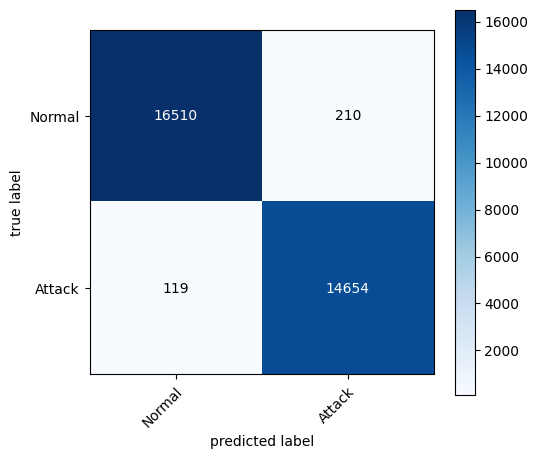

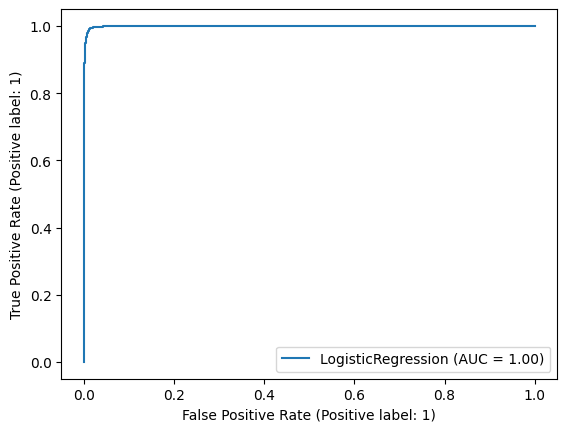

In [ ]:
LR = LogisticRegression(penalty='l2', C=1, solver='liblinear')  # Set hyperparameters manually
LR.fit(X_train_train, Y_train_train)
Evaluate('Logistic Regression', LR, X_train_train, Y_train_train, X_test_train, Y_test_train)

# SVM Classifier

In [ ]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train_train, Y_train_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

In [ ]:
Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

(0.9897860900305888, 0.98914044390817)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--------------------------------------------------

Training Results for SVM Linear SVC Kernel Model:
Training Accuracy   = 0.989
Training Sensitivity = 0.987
Training Precision  = 0.989
Training F1 Score   = 0.988
Training Recall     = 0.987
--------------------------------------------------

Testing Results for SVM Linear SVC Kernel Model:
Testing Accuracy   = 0.988
Testing Sensitivity = 0.986
Testing Precision  = 0.988
Testing F1 Score   = 0.987
Testing Recall     = 0.986
--------------------------------------------------



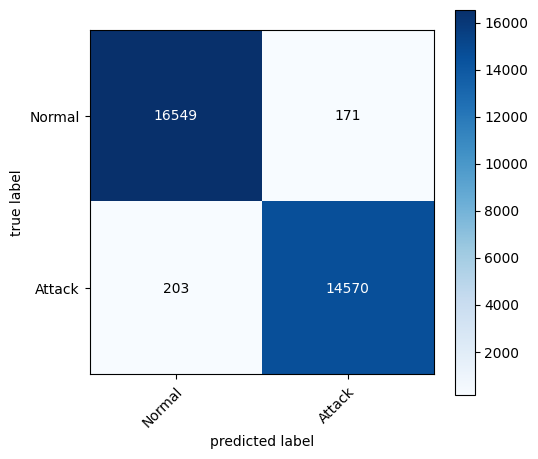

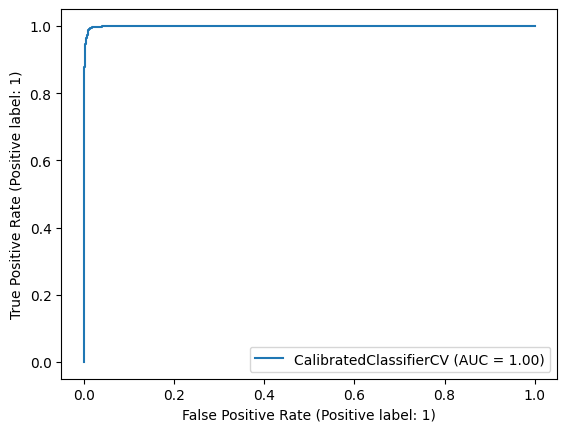

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(Linear_SVC, method='sigmoid')
calibrated_svc.fit(X_train_train, Y_train_train)

Evaluate('SVM Linear SVC Kernel', calibrated_svc, X_train_train, Y_train_train, X_test_train, Y_test_train)

# KNN Model

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=6)  # Set hyperparameter n_neighbors manually
KNN.fit(X_train_train, Y_train_train)

In [ ]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

In [ ]:
Evaluate('KNN', KNN, X_train_train, Y_train_train, X_test_train, Y_test_train)

# Random Forest

In [ ]:
# Random Forest
RF = RandomForestClassifier(max_depth=6)  # Set hyperparameter max_depth manually
RF.fit(X_train_train, Y_train_train)

In [ ]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

In [ ]:
Evaluate('Random Forest Classifier', RF, X_train_train, Y_train_train, X_test_train, Y_test_train)

# END